In [24]:
import sys
sys.path.append("D:/v1ktop/Drive/REPOS/augmentation_ap/")

In [25]:
 %load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
 %autoreload 2

In [27]:
man_dir="D:/corpus/anorexia/2018/train/"

In [28]:
import os

# Preprocess Docs

In [29]:
#from preprocesing import process_data_files

In [30]:
#process_data_files.prep_anorexia_data(man_dir+"original_files/", man_dir+"train_golden_truth.txt", 
#                                     man_dir+"prep_chunks/")

In [31]:
#man_dir="D:/corpus/anorexia/2018/test/"

In [32]:
#process_data_files.prep_anorexia_data(man_dir+"original_files/", man_dir+"test_golden_truth.txt", 
#                                     man_dir+"prep_chunks/")

In [33]:
#man_dir="D:/corpus/anorexia/2019/"

In [34]:
#process_data_files.prep_anorexia_data(man_dir+"original_files/", man_dir+"test_golden_truth.txt", 
#                                     man_dir+"prep_chunks/")

# Read training docs

In [35]:
from preprocesing.load_datasets import Dataset

In [36]:
data= Dataset(key="anorexia18_dev", chunking=False, remove_end=True)

## Positive docs

In [37]:
pos_docs=data.get_dataset(folder_name="prep_chunks", truth_name="train_golden_truth.txt",
                          partition="training", chunks=False)

In [38]:
len(pos_docs[0])

152

In [39]:
from classifier.explore_data import explore_data

## Explore data

In [41]:
exp_dta=explore_data(pos_docs[0], pos_docs[1], man_dir)

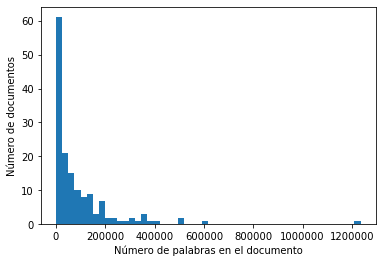

In [42]:
exp_dta.plot_sample_length_distribution()

In [18]:
import pandas as pd

In [19]:
df = pd.DataFrame(pos_docs[0],index=[i for i in range (len(pos_docs[0]))], columns=["doc"])

In [20]:
df["truth"]=pos_docs[1]

In [21]:
pos_docs_1=list (df[df["truth"]==1]["doc"])

In [22]:
len(pos_docs_1)

20

In [23]:
explore_data.plot_sample_length_distribution(pos_docs_1)

AttributeError: module 'classifier.explore_data' has no attribute 'plot_sample_length_distribution'

In [ ]:
explore_data.plot_frequency_distribution_of_ngrams(pos_docs_1, (1,1), 20)

## Negative docs

In [ ]:
pos_docs_0=list (df[df["truth"]==0]["doc"])

In [ ]:
explore_data.plot_sample_length_distribution(pos_docs_0)

In [ ]:
explore_data.plot_frequency_distribution_of_ngrams(pos_docs_0, (1,1), 20)

## Both clases

In [ ]:
explore_data.plot_class_distribution(pos_docs[1])

In [ ]:
explore_data.plot_sample_length_distribution(pos_docs[0])

In [ ]:
explore_data.plot_frequency_distribution_of_ngrams(pos_docs[0], (1,1), 20)

In [ ]:
explore_data.plot_frequency_distribution_of_ngrams(pos_docs[0], (2,2), 20)

In [ ]:
explore_data.plot_frequency_distribution_of_ngrams(pos_docs[0], (3,3), 20)

# Clasificacion y ganancia de informacion

In [122]:
from classifier.SVM_Text import SVM_text

In [123]:
from classifier.FeactureExtraction import feature_extraction

In [124]:
svm_obj=SVM_text(pos_docs[0], pos_docs[1], weighted=True)

## Cargar conjunto de test

In [146]:
svm_obj.extract_features(pos_docs[0], idf=True, stop_words=None, norm="l2")

# Features:  (152, 67724)
Training:  (152, 67724)
Testing:  (152, 67724)


In [147]:
svm_obj.train_and_test(pos_docs[1], p_label=1)

Confusion matrix:  [[129   3]
 [  2  18]]
Scores: [67724, 0.9671052631578947, 0.8571428571428571, 0.9, 0.8780487804878048]


[67724, 0.9671052631578947, 0.8571428571428571, 0.9, 0.8780487804878048]

In [148]:
svm_obj.ft.get_chi_2(pos_docs[1], 100)

Index(['calories', 'weight', 'autism', 'anorexia', 'lbs', 'skipped', 'eating',
       'treatments', 'my', 'fasting', 'diet', 'autistic', 'mince', 'binge',
       'dinner', 'cf', 'butter', 'snacks', 'breakfast', 'disorder', 'binging',
       'peanut', 'im', 'recovery', 'bronkaid', 'boyfriend', 'mio', 'nausea',
       'celery', 'anxiety', 'dubai', 'the', 'belfast', 'bmi', 'cal', 'tbsp',
       'caffeine', 'purging', 'diagnosed', 'backpackers', 'yj', 'cucumber',
       'ed', 'recovering', 'cinnamon', 'chubby', 'gain', 'coke', 'cals',
       'meal', 'medication', 'barbell', 'depression', 'oatmeal', 'lunch',
       'calorie', 'rice', 'antacids', 'cardio', 'hallucinations', 'anorexic',
       'fat', 'food', 'tea', 'adhd', 'myself', 'luna', 'hostel', 'macros',
       'fork', 'tofu', 'vegan', 'restriction', 'stroked', 'tims', 'furyball',
       'perimeters', 'shimmery', 'makeupless', 'peachypink', 'charliehorseing',
       'treatment', 'sugar', 'auditory', 'neuro', 'purged', 'therapist',
     

## Validation

In [128]:
val=data.get_dataset(folder_name="prep_chunks", truth_name="test_golden_truth.txt",
                          partition="test", chunks=False)

In [129]:
svm_obj.extract_features(val[0], idf=True, stop_words="None", norm="l2")

# Features:  (152, 67416)
Training:  (152, 67416)
Testing:  (320, 67416)


In [130]:
svm_obj.train_and_test(val[1], p_label=1)

Confusion matrix:  [[278   1]
 [ 17  24]]
Scores: [67416, 0.94375, 0.96, 0.5853658536585366, 0.7272727272727272]


[67416, 0.94375, 0.96, 0.5853658536585366, 0.7272727272727272]

# Test real

In [131]:
data2= Dataset(key="anorexia18_test", chunking=False, remove_end=True)

In [132]:
test=data2.get_dataset(folder_name="prep_chunks", truth_name="test_golden_truth.txt",
                          partition="test", chunks=False)

In [133]:
svm_obj.extract_features(test[0], idf=True, stop_words="english", norm="l2")

# Features:  (152, 67416)
Training:  (152, 67416)
Testing:  (815, 67416)


In [134]:
svm_obj.train_and_test(test[1], p_label=1)

Confusion matrix:  [[739   3]
 [ 31  42]]
Scores: [67416, 0.9582822085889571, 0.9333333333333333, 0.5753424657534246, 0.7118644067796611]


[67416,
 0.9582822085889571,
 0.9333333333333333,
 0.5753424657534246,
 0.7118644067796611]